# **Lab Exercise 6: Text Classification using CNN**

## Name: Vishwa R
## Reg. No: 21BAI1772

In [29]:
!pip install keras

In [169]:
#import libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

In [170]:
# Load the dataset
max_words = 100000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [171]:
#before padding
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [172]:
# Padding sequences
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [173]:
#after padding
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

#Model 1: Basic CNN with Small Filters and Kernel

In [174]:
model1 = Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=64))
model1.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
#training the model
history1=model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5744 - loss: 0.6651 - val_accuracy: 0.8044 - val_loss: 0.4809
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7830 - loss: 0.4730 - val_accuracy: 0.8602 - val_loss: 0.3499
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8710 - loss: 0.3335 - val_accuracy: 0.8758 - val_loss: 0.3061
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9171 - loss: 0.2464 - val_accuracy: 0.8796 - val_loss: 0.2874
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9428 - loss: 0.1584 - val_accuracy: 0.8844 - val_loss: 0.2958
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9560 - loss: 0.1166 - val_accuracy: 0.8826 - val_loss: 0.3226
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9610 - loss: 0.0933 - val_accuracy: 0.8830 - val_loss: 0.3452
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9669 - loss: 0.0779 - val_accu

In [176]:
model1.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_55 (Embedding)             │ (None, 500, 64)             │       6,400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_123 (Conv1D)                  │ (None, 498, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_46              │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,219,553 (73.32 MB)

 Trainable params: 6,406,517 (24.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,813,036 (48.88 MB)

### Comment on the model
First Layer embeds the input and returns it as (500,64) dimension vector, which is proceeded by a convolutional layer and global_max_pooling layer which is used to convert 2D data to 1D data. The dense layers are the final layers. When i tried to run the model without the Dropout layer, I found the model to overfit and accurately predict the training dataset.

#Model 2 - Deeper version of Model 1 with larger embedding size

In [177]:
model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=128))
model2.add(Conv1D(filters=64, kernel_size=5, strides=2, activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=5, strides=2, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
history2=model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5551 - loss: 0.6715 - val_accuracy: 0.8306 - val_loss: 0.3876
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8507 - loss: 0.3746 - val_accuracy: 0.8638 - val_loss: 0.3267
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9293 - loss: 0.2105 - val_accuracy: 0.8566 - val_loss: 0.3672
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9632 - loss: 0.1258 - val_accuracy: 0.8544 - val_loss: 0.5074
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9730 - loss: 0.0874 - val_accuracy: 0.8576 - val_loss: 0.5649
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9790 - loss: 0.0673 - val_accuracy: 0.8578 - val_loss: 0.6172
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9818 - loss: 0.0590 - val_accuracy: 0.8366 - val_loss: 0.6421
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9814 - loss: 0.0563 - val_acc

In [179]:
model2.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_56 (Embedding)             │ (None, 500, 128)            │      12,800,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_124 (Conv1D)                  │ (None, 248, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_125 (Conv1D)                  │ (None, 122, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_47              │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,586,689 (147.20 MB)

 Trainable params: 12,862,229 (49.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,724,460 (98.13 MB)

### Comment on the model
This model has 2 Convolutional Layers and the embedding size is increased to 256 which means each token is represented by a vector of length 256, hence more information can be represented. I have increased the kernel size and stride length too.

#Model 3 - Deeper than Model 2

In [182]:
model3 = Sequential()
model3.add(Embedding(input_dim=max_words, output_dim=256))
model3.add(Conv1D(filters=256, kernel_size=7, strides=3, activation='relu'))
model3.add(Conv1D(filters=128, kernel_size=7, strides=3, activation='relu'))
model3.add(Conv1D(filters=64, kernel_size=5, strides=2, activation='relu'))
model3.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [183]:
history3=model3.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.5062 - loss: 0.6936 - val_accuracy: 0.5476 - val_loss: 0.6929
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5969 - loss: 0.6494 - val_accuracy: 0.7608 - val_loss: 0.4826
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8204 - loss: 0.4182 - val_accuracy: 0.8640 - val_loss: 0.3183
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8900 - loss: 0.2288 - val_accuracy: 0.8634 - val_loss: 0.3461
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9216 - loss: 0.1442 - val_accuracy: 0.8674 - val_loss: 0.4134
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9307 - loss: 0.1087 - val_accuracy: 0.8628 - val_loss: 0.6017
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9361 - loss: 0.0939 - val_accuracy: 0.8548 - val_loss: 0.7971
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9317 - loss: 0.0994 - va

In [184]:
model3.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_58 (Embedding)             │ (None, 500, 256)            │      25,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_130 (Conv1D)                  │ (None, 165, 256)            │         459,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_131 (Conv1D)                  │ (None, 53, 128)             │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_132 (Conv1D)                  │ (None, 25, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_133 (Conv1D)                  │ (None, 23, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_49              │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,008,161 (301.39 MB)

 Trainable params: 26,336,053 (100.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,672,108 (200.93 MB)

###Comment on the model
this model is deeper than the previous with 4 convolutional layers and I have increased the Kernel sizes and Strides too so that each kernel can learn more difference between the positive and negative classes

#Evaluate models performance

In [185]:
# Function to evaluate model performance
def evaluate_model(model, x_test, y_test):
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate all models
scores = {}
scores['Model 1'] = evaluate_model(model1, x_test, y_test)
scores['Model 2'] = evaluate_model(model2, x_test, y_test)
scores['Model 3'] = evaluate_model(model3, x_test, y_test)

# Print evaluation metrics for each model
for model_name, score in scores.items():
    print(f'{model_name}: Precision: {score[0]:.2f}, Recall: {score[1]:.2f}, F1 Score: {score[2]:.2f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Model 1: Precision: 0.89, Recall: 0.85, F1 Score: 0.87
Model 2: Precision: 0.81, Recall: 0.86, F1 Score: 0.84
Model 3: Precision: 0.80, Recall: 0.87, F1 Score: 0.83



### Table

| Model   | Precision | Recall | F1 Score |
|---------|-----------|--------|----------|
| Model 1 | 0.89      | 0.85   | 0.87     |
| Model 2 | 0.81      | 0.86   | 0.84     |
| Model 3 | 0.80      | 0.87   | 0.83     |

###Comment on Scores
- Model 1 has the highest precision (0.89) and F1 score (0.87), indicating the best balance between false positives and false negatives.
- Model 2 has a slightly lower precision (0.81) but higher recall (0.86), meaning it catches more true positives at the expense of some false positives.
- Model 3 has the lowest precision (0.80) but the highest recall (0.87), making it better at identifying positives but prone to more false positives.
- Model 3 sacrifices precision for higher recall.
- This also says that bigger or deeper is NOT always the better and almost everything depends on the data.
- One regression that I noticed was the more the embeddings size the lesser the model performance.

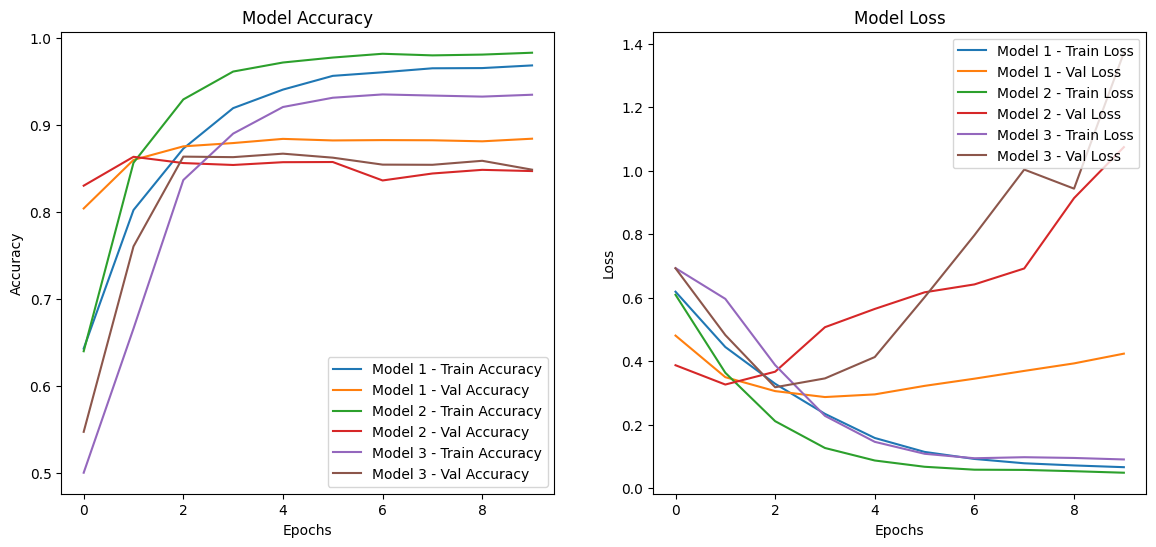

In [187]:
import matplotlib.pyplot as plt
def plot_history(history1, history2, history3):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Model 1 - Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Model 1 - Val Accuracy')
    plt.plot(history2.history['accuracy'], label='Model 2 - Train Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 - Val Accuracy')
    plt.plot(history3.history['accuracy'], label='Model 3 - Train Accuracy')
    plt.plot(history3.history['val_accuracy'], label='Model 3 - Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Model 1 - Train Loss')
    plt.plot(history1.history['val_loss'], label='Model 1 - Val Loss')
    plt.plot(history2.history['loss'], label='Model 2 - Train Loss')
    plt.plot(history2.history['val_loss'], label='Model 2 - Val Loss')
    plt.plot(history3.history['loss'], label='Model 3 - Train Loss')
    plt.plot(history3.history['val_loss'], label='Model 3 - Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_history(history1, history2, history3)


- Model 1 is performing better overall with balanced accuracy and loss for both training and validation, indicating that it generalizes better to unseen data.
- Model 2 appears to overfit the training data, as indicated by the large gap between training and validation performance.
- Model 3 struggles with stability, having fluctuating validation loss, which could be due to the architecture not being well-suited for the data.

#Inference from random samples

In [153]:
# Get the word index from the IMDb dataset
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Function to decode a review back to text
def decode_review(text_sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_sequence if i > 0])


In [154]:
# Select 5 random samples from the test set
sample_indices = np.random.choice(range(len(x_test)), 5, replace=False)
sample_reviews = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Decode reviews to text
decoded_reviews = [decode_review(review) for review in sample_reviews]

# Make predictions (using model1 for example)
predicted_probabilities = model1.predict(sample_reviews)
predicted_labels = (predicted_probabilities > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [155]:
for i in range(5):
    print(f"Review {i+1}: {decoded_reviews[i]}")
    print(f"Actual Label: {'Positive' if sample_labels[i] == 1 else 'Negative'}")
    print(f"Predicted Label: {'Positive' if predicted_labels[i] == 1 else 'Negative'}")
    print("-" * 50)


Review 1: ? this movie was thought to be low budget but it turned out to be awesome i just rented it from blockbuster and i loved it the acting was very good hot women and some scary parts it is plain and simply worth the money to pay for
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review 2: not only doesn't focus on the soldiers or politics involved there is politics but not how you'd think it'd be shown it deals with its two main subjects as the only two beings that can possibly be cared about at all in this brutal decaying society they inhabit ingmar bergman in the midst of his prime and following two other heavily psychological films persona and hour of the wolf is far more interested in seeing what the effect of war has on usually civilized beings that it brings out the worst in them and also in a cathartic way is a reminder of what is truly crucial in living his two key actors are frequent collaborators and friends max von s

In [156]:
sample_indices

array([ 2789,  5142, 13430,  4888, 14814])

### In this sample of 5 reviews, if you notice the 4th review the review starts with "***this movie is horrible and wonderful at the same time***" so this is not technically a Negative Review, it is more of a Mixed review. Because of the word "wonderful", the 1st CNN model might have got confused and predicted it as Positive.